# 02_08_plot_light_curve_using_csv

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, scipy, astropy, astroquery, photutils, ccdproc, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name=version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

In [3]:
import importlib, sys, subprocess
packages = "numpy, pandas, matplotlib, scipy, astropy, astroquery, photutils, ysfitsutilpy, ysphotutilpy, ccdproc, aplpy, sncosmo, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        print(f"**** module {pkg} is being installed")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
    else: 
        print(f"**** module {pkg} is installed")

%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

**** module numpy is installed
**** module pandas is installed
**** module matplotlib is installed
**** module scipy is installed
**** module astropy is installed
**** module astroquery is installed
**** module photutils is installed
**** module ysfitsutilpy is installed
**** module ysphotutilpy is installed
**** module ccdproc is installed
**** module aplpy is installed
**** module sncosmo is installed
**** module version_information is installed
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information
This notebook was generated at 2024-11-27 16:10:23 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 6.8.0 49 generic x86_64 with glibc2.39
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.9.2
6 scipy      1.14.1
7 astropy    6.1.0
8 astroquery 0.4.7
9 photutils  1.12.0
10 ysfitsutilpy 0.2
11 ysphotutilpy 0.1.1
12 ccdproc    2.4.2
13 aplpy      2.1.0
14 sncosmo    2.11.2
15 version_inform

Wool server 

This notebook was generated at 2024-11-27 16:10:23 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 6.8.0 49 generic x86_64 with glibc2.39
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.9.2
6 scipy      1.14.1
7 astropy    6.1.0
8 astroquery 0.4.7
9 photutils  1.12.0
10 ysfitsutilpy 0.2
11 ysphotutilpy 0.1.1
12 ccdproc    2.4.2
13 aplpy      2.1.0
14 sncosmo    2.11.2
15 version_information 1.0.4


### import modules

In [76]:
#%%
from glob import glob
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ccdproc import combine, ccd_process, CCDData

from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.wcs import WCS
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

import astropy.units as u

import ysfitsutilpy as yfu
import ysphotutilpy as ypu

import _astro_utilities
import _Python_utilities
import _tool_visualization

from astropy.nddata import Cutout2D
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clip, sigma_clipped_stats
from photutils.centroids import centroid_com

from photutils.aperture import CircularAperture as CAp
from photutils.aperture import CircularAnnulus as CAn
from photutils.aperture import aperture_photometry as apphot

In [77]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/OBS_data")  

PROJECDIR = BASEDIR / "C1-Variable"
TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-01_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2022-01_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C2-Asteroid"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_1bin"
# # TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C3-EXO"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2024-09_-_GSON300_STF-8300M_-_1bin"

# PROJECDIR = BASEDIR / "C4-Spectra"
# TODODIR = PROJECDIR / "-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

try : 
    BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
    print ("BDFDIR: ", format(BDFDIR))
    BDFDIR = Path(BDFDIR[0]) 
except : 
    pass

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
# print ("DOINGDIRs: ", format(DOINGDIRs))
# print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = 'CY-AQR'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in str(x)]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################
print ("len(DOINGDIRs): ", len(DOINGDIRs))

DOINGDIRs:  ['/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-07_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-08_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-09_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-10_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-13_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-14_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LI

In [78]:
# DOINGDIRs = DOINGDIRs[1:2]
# print("DOINGDIRs:", DOINGDIRs)

In [79]:
#####################################################################
# Observed location
LOCATION = dict(lon=127.005, lat=37.308889, elevation=101)
Suwon = location = EarthLocation(lon=127.005 * u.deg, 
                                 lat=37.308889 * u.deg, 
                                 height=101 * u.m)
observatory_code = "P64"

# Used for any `astropy.SkyCoord` object:
SKYC_KW = dict(unit=u.deg, frame='icrs')

#######################################################
# Initial guess of FWHM in pixel
FWHM_INIT = 4

# Photometry parameters
R_AP = 1.5*FWHM_INIT # Aperture radius
R_IN = 4*FWHM_INIT   # Inner radius of annulus
R_OUT = 6*FWHM_INIT  # Outer radius of annulus

Mag_Low = 11.5
Mag_High = 15

Mag_target = 12.5
Mag_delta = 2
ERR_Max = 0.5
#######################################################


coord_delta = 0.00001
coord_delta = 0.00003
# coord_delta = 0.00005
# coord_delta = 0.00006
coord_delta = 0.000075
coord_delta = 0.00008
# coord_delta = 0.00009
coord_delta = 0.00010
# coord_delta = 0.0002
# coord_delta = 0.0005
coord_deltas = np.arange(0.00001, 0.00050, 0.00001)
#######################################################


In [80]:
for DOINGDIR in DOINGDIRs[5:6] :
    DOINGDIR = Path(DOINGDIR)
    print("DOINGDIR", DOINGDIR)

    READINGDIR = DOINGDIR / _astro_utilities.reduced_dir
    # READINGDIR = DOINGDIR / _astro_utilities.reduced_nightsky_dir
    
    # DIFFPRESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_DPhot_Mag{Mag_target}"
    DIFFPRESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_DPhot_Mag{Mag_target}_fw{FWHM_INIT}"
    LIGHTCUEVEDIR = DOINGDIR / "LightCurve"
    if not LIGHTCUEVEDIR .exists():
        os.makedirs("{}".format(str(LIGHTCUEVEDIR )))
        print("{} is created...".format(str(LIGHTCUEVEDIR )))
    

DOINGDIR /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-14_-_RiLA600_STX-16803_-_2bin


In [65]:
csv_in_dir = sorted(list(DIFFPRESULTDIR.glob('*result_photometry.csv')))
if len(csv_in_dir) == 0 : 
    print("len(csv_in_dir):", len(csv_in_dir))
else : 
    df = pd.DataFrame()
    for fpath in csv_in_dir[:]:
        fpath = Path(fpath)
        print(f"starting... {fpath}")
        df_csv = pd.read_csv(fpath)
        df = pd.concat([df, df_csv], axis=0)
    

starting... /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-14_-_RiLA600_STX-16803_-_2bin/reduced_DPhot_Mag12.5_fw4/GK-BOO_LIGHT_B_2017-03-14-14-26-55_80sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv
starting... /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-14_-_RiLA600_STX-16803_-_2bin/reduced_DPhot_Mag12.5_fw4/GK-BOO_LIGHT_B_2017-03-14-14-29-54_80sec_RiLA600_STX-16803_-20c_2bin_result_photometry.csv
starting... /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-14_-_RiLA600_STX-16803_-_2bin/reduced_DPhot_Mag12.5_fw4/GK-BOO_LIGHT_B_2017-03-14-14-32-53_100sec_RiLA600_STX-16803_-19c_2bin_result_photometry.csv
starting... /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin/GK-BOO_LIGHT_-_2017-03-14_-_RiLA600_STX-16803_-_2bin/reduced_DPhot_Mag12.5_fw4/GK-BOO_LIGHT_B_2017-03-14-14-36-23_100sec_RiLA600_STX-16803_-20c_2bin_

In [66]:
# df_csv

In [67]:
print(len(df_csv))
df_csv
print(len(df))
df

93
38760


,Unnamed: 0,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,...,t_middle,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000,R_magnitude,V_magnitude
0,0,1,1575.152879,47.490036,293842.843750,2547.030073,54.630593,1003.0,5.0,5780.528982,...,2017-03-14T14:27:35.000,B,-24.031498,-24.015480,0.034804,14.626579,219.351018,36.787521,NaN,NaN
1,1,2,1383.841465,77.797469,295335.696045,2555.585167,54.312004,1004.0,2.0,6305.822978,...,2017-03-14T14:27:35.000,B,-24.031498,-24.015480,0.034804,14.532144,219.433304,36.776667,NaN,NaN
2,2,3,1322.735356,105.931565,285709.602539,2573.779341,55.694309,1007.0,1.0,-5377.983223,...,2017-03-14T14:27:35.000,B,-24.031498,-24.015480,0.034804,NaN,219.459524,36.766819,NaN,NaN
3,3,4,58.963345,144.969293,313871.671631,2492.599894,58.149940,993.0,6.0,31965.265028,...,2017-03-14T14:27:35.000,B,-24.031498,-24.015480,0.034804,12.769803,220.003428,36.748936,NaN,NaN
4,4,5,249.495783,147.575180,380596.756836,2520.773249,53.910223,994.0,6.0,95504.018860,...,2017-03-14T14:27:35.000,B,-24.031498,-24.015480,0.034804,11.581444,219.921391,36.748885,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,89,1196.505181,1825.036036,392816.679688,3443.876428,60.665925,1002.0,7.0,3323.431797,...,2017-03-14T21:06:05.000,V,-23.716410,-23.883137,0.025835,NaN,219.507388,36.172963,NaN,14.912443
89,89,90,166.225945,1826.272921,380630.499512,3305.846601,61.283823,997.0,5.0,6748.057289,...,2017-03-14T21:06:05.000,V,-23.716410,-23.883137,0.025835,NaN,219.947665,36.167365,NaN,14.143463
90,90,91,521.144244,1877.904451,383733.300293,3353.597174,61.398831,998.0,2.0,4450.395479,...,2017-03-14T21:06:05.000,V,-23.716410,-23.883137,0.025835,NaN,219.795700,36.151550,NaN,14.595413
91,91,92,421.409704,1907.096495,380089.614746,3327.033885,63.887272,1006.0,1.0,3810.947184,...,2017-03-14T21:06:05.000,V,-23.716410,-23.883137,0.025835,NaN,219.838129,36.140934,NaN,14.763827


In [68]:
df.columns

Index(['Unnamed: 0', 'id', 'xcenter', 'ycenter', 'aperture_sum', 'msky',
       'sky_std', 'nsky', 'nrej', 'flux_star', 'flux_err', 'mag_ann',
       'merr_ann', 'filename', 't_start', 't_expos', 't_middle', 'filter',
       'zeropt_med', 'zeropt_avg', 'e_zeropt', 'B_magnitude', 'RAJ2000',
       'DEJ2000', 'R_magnitude', 'V_magnitude'],
      dtype='object')

In [69]:
df['t_middle_dt'] = pd.to_datetime(df['t_middle'])
df = df.drop(columns=['Unnamed: 0'], axis=0)
# df.drop(['Unnamed: 0', 'id'], axis=0)
# df = df.set_index('id')
df = df.reset_index(drop=True)
df

,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,flux_err,...,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000,R_magnitude,V_magnitude,t_middle_dt
0,1,1575.152879,47.490036,293842.843750,2547.030073,54.630593,1003.0,5.0,5780.528982,666.130047,...,B,-24.031498,-24.015480,0.034804,14.626579,219.351018,36.787521,NaN,NaN,2017-03-14 14:27:35
1,2,1383.841465,77.797469,295335.696045,2555.585167,54.312004,1004.0,2.0,6305.822978,666.971383,...,B,-24.031498,-24.015480,0.034804,14.532144,219.433304,36.776667,NaN,NaN,2017-03-14 14:27:35
2,3,1322.735356,105.931565,285709.602539,2573.779341,55.694309,1007.0,1.0,-5377.983223,659.970030,...,B,-24.031498,-24.015480,0.034804,NaN,219.459524,36.766819,NaN,NaN,2017-03-14 14:27:35
3,4,58.963345,144.969293,313871.671631,2492.599894,58.149940,993.0,6.0,31965.265028,691.397395,...,B,-24.031498,-24.015480,0.034804,12.769803,220.003428,36.748936,NaN,NaN,2017-03-14 14:27:35
4,5,249.495783,147.575180,380596.756836,2520.773249,53.910223,994.0,6.0,95504.018860,743.531910,...,B,-24.031498,-24.015480,0.034804,11.581444,219.921391,36.748885,NaN,NaN,2017-03-14 14:27:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38755,89,1196.505181,1825.036036,392816.679688,3443.876428,60.665925,1002.0,7.0,3323.431797,764.077544,...,V,-23.716410,-23.883137,0.025835,NaN,219.507388,36.172963,NaN,14.912443,2017-03-14 21:06:05
38756,90,166.225945,1826.272921,380630.499512,3305.846601,61.283823,997.0,5.0,6748.057289,755.167075,...,V,-23.716410,-23.883137,0.025835,NaN,219.947665,36.167365,NaN,14.143463,2017-03-14 21:06:05
38757,91,521.144244,1877.904451,383733.300293,3353.597174,61.398831,998.0,2.0,4450.395479,757.912705,...,V,-23.716410,-23.883137,0.025835,NaN,219.795700,36.151550,NaN,14.595413,2017-03-14 21:06:05
38758,92,421.409704,1907.096495,380089.614746,3327.033885,63.887272,1006.0,1.0,3810.947184,758.668608,...,V,-23.716410,-23.883137,0.025835,NaN,219.838129,36.140934,NaN,14.763827,2017-03-14 21:06:05


In [70]:
targ_name = DOINGDIR.parts[-1].split("_")[0]
targ_name = targ_name.replace("-"," ")
print("targ_name :", targ_name)

targ_name : GK BOO


In [71]:
# targ_name = "WASP 24B"
# from astroquery.simbad import Simbad
# result_table = Simbad.query_object(targ_name)
# result_table

In [72]:
DOINGDIR.parts
from astroquery.simbad import Simbad
result_table = Simbad.query_object(targ_name)
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MaxA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
V* GK Boo,14 38 20.6952,+36 32 25.278,14,14,0.008,0.010,90,A,O,2020yCat.1350....0G,1


In [73]:
# from astroquery.vizier import Vizier
# vizier = Vizier()
# result_tabel = vizier.query_object(targ_name)
# result_tabel

In [74]:
result_table.columns

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MaxA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE','SCRIPT_NUMBER_ID')>

In [81]:
if not result_table :
    print("there is no result...")
else : 
    # print(result_table.columns)
    print("result_table :", result_table)

    # type(result_table['RA'][0])
    # result_table['RA'][0].split(" ")
    targ_sky = SkyCoord(ra=f"{result_table['RA'][0].split(' ')[0]}h{result_table['RA'][0].split(' ')[1]}m{result_table['RA'][0].split(" ")[2]}s",
                   dec=f"{result_table['DEC'][0].split(' ')[0]}d{result_table['DEC'][0].split(' ')[1]}m{result_table['DEC'][0].split(" ")[2]}s", frame='icrs')
    print("targ_sky :", targ_sky)

    df_targ = df.loc[(df["RAJ2000"] > targ_sky.ra.value*(1-coord_delta)) \
                    & (df["RAJ2000"] < targ_sky.ra.value*(1+coord_delta)) \
                    & (df["DEJ2000"] > targ_sky.dec.value*(1-coord_delta))\
                    & (df["DEJ2000"] < targ_sky.dec.value*(1+coord_delta))\
                    & (df["merr_ann"] < ERR_Max)]


result_table :  MAIN_ID        RA           DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... ------------------- ----------------
V* GK Boo 14 38 20.6952 +36 32 25.278 ... 2020yCat.1350....0G                1
targ_sky : <SkyCoord (ICRS): (ra, dec) in deg
    (219.58623, 36.540355)>


In [82]:
# targ_sky = SkyCoord(ra=f"{result_table['RA'][0].split(' ')[0]}h{result_table['RA'][0].split(' ')[1]}m{result_table['RA'][0].split(" ")[2]}s",
#                    dec=f"{result_table['DEC'][0].split(' ')[0]}d{result_table['DEC'][0].split(' ')[1]}m{result_table['DEC'][0].split(" ")[2]}s", frame='icrs')
# targ_sky


In [83]:
# df["RAJ2000"][0]
# targ_sky.ra.value

In [84]:
# print(df.columns)

# df['t_middle_dt'] = pd.to_datetime(df['t_middle'])

# coord_delta = 0.00001
# coord_delta = 0.0001

# df_targ = df.loc[(df["RAJ2000"] > targ_sky.ra.value*(1-coord_delta)) \
#                  & (df["RAJ2000"] < targ_sky.ra.value*(1+coord_delta)) \
#                  & (df["DEJ2000"] > targ_sky.dec.value*(1-coord_delta))\
#                  & (df["DEJ2000"] < targ_sky.dec.value*(1+coord_delta))]
# df['t_middle_dt'] = pd.to_datetime(df['t_middle'])


In [85]:
df_targ

,id,xcenter,ycenter,aperture_sum,msky,sky_std,nsky,nrej,flux_star,flux_err,...,filter,zeropt_med,zeropt_avg,e_zeropt,B_magnitude,RAJ2000,DEJ2000,R_magnitude,V_magnitude,t_middle_dt
26,27,1022.262700,759.794714,346854.222656,2678.103063,51.180224,996.0,4.0,43967.901999,709.875289,...,B,-24.031498,-24.015480,0.034804,12.423659,219.586489,36.540410,NaN,NaN,2017-03-14 14:27:35
27,28,1033.880974,759.501415,347881.980713,2680.181158,49.618451,1000.0,4.0,44760.633026,708.352584,...,B,-24.031498,-24.015480,0.034804,12.404258,219.581501,36.540546,NaN,NaN,2017-03-14 14:27:35
99,27,1021.992148,759.256998,338276.415283,2663.420414,53.530558,1000.0,4.0,37050.663045,705.612774,...,B,-23.951173,-23.980501,0.035994,12.529183,219.586502,36.540414,NaN,NaN,2017-03-14 14:30:34
100,28,1033.616403,758.992257,340614.966064,2656.465570,50.948224,1000.0,8.0,40175.788220,703.770719,...,B,-23.951173,-23.980501,0.035994,12.441262,219.581512,36.540539,NaN,NaN,2017-03-14 14:30:34
173,24,1032.939168,758.305374,422457.230713,3259.491927,57.581158,1002.0,3.0,53817.378641,783.548144,...,B,-24.200679,-24.218433,0.032607,12.373372,219.581531,36.540564,NaN,NaN,2017-03-14 14:33:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38537,41,1032.043171,757.484463,244542.127808,1441.883553,45.216949,1003.0,5.0,81468.939825,601.484839,...,V,-23.764351,-23.835413,0.018960,NaN,219.581527,36.540571,NaN,11.486870,2017-03-14 20:59:07
38622,31,1033.218594,757.464175,331359.289551,2122.055029,48.635447,997.0,11.0,91360.519892,692.050445,...,V,-23.765883,-23.875122,0.021036,NaN,219.581539,36.540552,NaN,11.363987,2017-03-14 21:02:36
38623,32,1021.662853,757.723603,364104.043457,2120.256357,47.960298,1001.0,4.0,124308.698829,720.402633,...,V,-23.765883,-23.875122,0.021036,NaN,219.586498,36.540413,NaN,11.029630,2017-03-14 21:02:36
38706,40,1024.495131,757.937369,517630.831543,3525.199532,56.251389,1001.0,7.0,118940.157233,855.433578,...,V,-23.716410,-23.883137,0.025835,NaN,219.586483,36.540418,NaN,11.028089,2017-03-14 21:06:05


In [86]:
check_filter = df_targ['filter'].drop_duplicates()
check_filter = check_filter.reset_index(drop=True)
check_filter

0    B
1    R
2    V
Name: filter, dtype: object

In [87]:
df_targ["t_middle_dt"]
type(df_targ["t_middle_dt"])

pandas.core.series.Series

In [88]:
ttime = Time(df_targ["t_middle_dt"])
print(type(ttime))
print(len(ttime))
print(ttime)
print(ttime.mjd)

<class 'astropy.time.core.Time'>
678
['2017-03-14T14:27:35.000000000' '2017-03-14T14:27:35.000000000'
 '2017-03-14T14:30:34.000000000' '2017-03-14T14:30:34.000000000'
 '2017-03-14T14:33:43.000000000' '2017-03-14T14:33:43.000000000'
 '2017-03-14T14:37:13.000000000' '2017-03-14T14:37:13.000000000'
 '2017-03-14T14:40:43.000000000' '2017-03-14T14:40:43.000000000'
 '2017-03-14T14:44:15.000000000' '2017-03-14T14:44:15.000000000'
 '2017-03-14T14:47:45.000000000' '2017-03-14T14:47:45.000000000'
 '2017-03-14T14:51:15.000000000' '2017-03-14T14:51:15.000000000'
 '2017-03-14T14:54:44.000000000' '2017-03-14T14:54:44.000000000'
 '2017-03-14T14:58:17.000000000' '2017-03-14T14:58:17.000000000'
 '2017-03-14T15:01:52.000000000' '2017-03-14T15:01:52.000000000'
 '2017-03-14T15:05:22.000000000' '2017-03-14T15:05:22.000000000'
 '2017-03-14T15:09:08.000000000' '2017-03-14T15:09:08.000000000'
 '2017-03-14T15:12:39.000000000' '2017-03-14T15:12:39.000000000'
 '2017-03-14T15:16:08.000000000' '2017-03-14T15:16:08

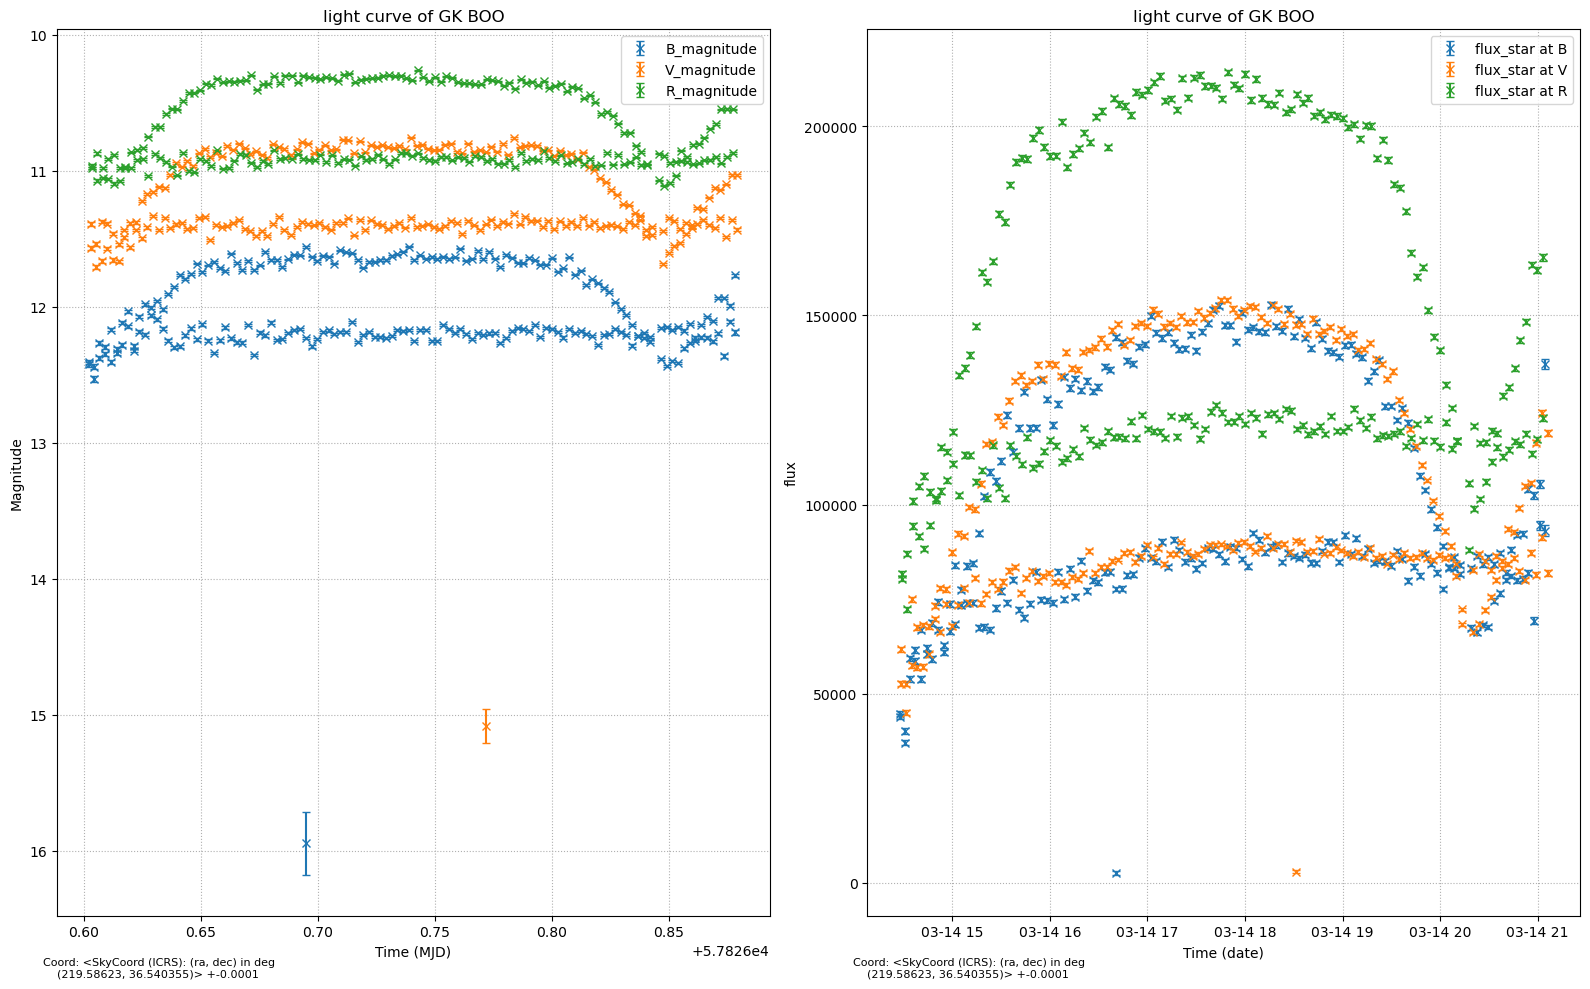

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10), 
                            sharex=False, sharey=False, gridspec_kw=None)

chls = ['B', 'V', 'R']
for chl in chls :
    # if f'{chl}_magnitude' in df_targ:    
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd, 
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"], 
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{LIGHTCUEVEDIR}/{READINGDIR.parts[-2]}_{READINGDIR.parts[-1]}_light_curve_{coord_delta}.png")

plt.show()

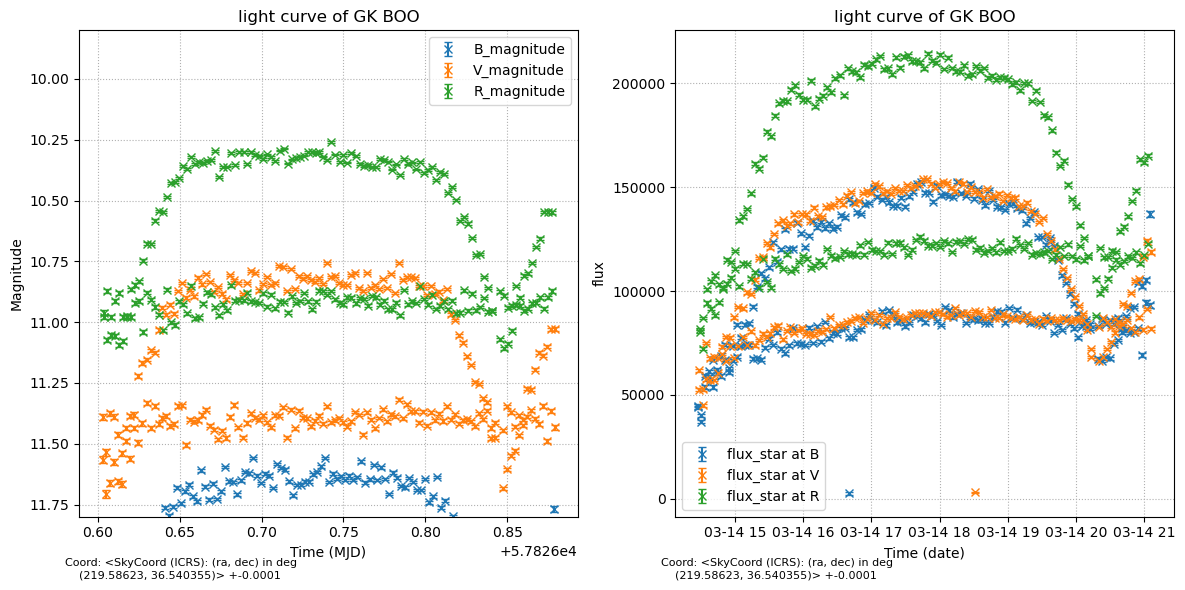

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), 
                            sharex=False, sharey=False, gridspec_kw=None)

chls = ['B', 'V', 'R']
for chl in chls :
    # if f'{chl}_magnitude' in df_targ:    
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd, 
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"], 
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
    ylim=(10.8+1, 10.8-1)
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
) 
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{LIGHTCUEVEDIR}/{READINGDIR.parts[-2]}_{READINGDIR.parts[-1]}_light_curve_{coord_delta}.png")

plt.show()

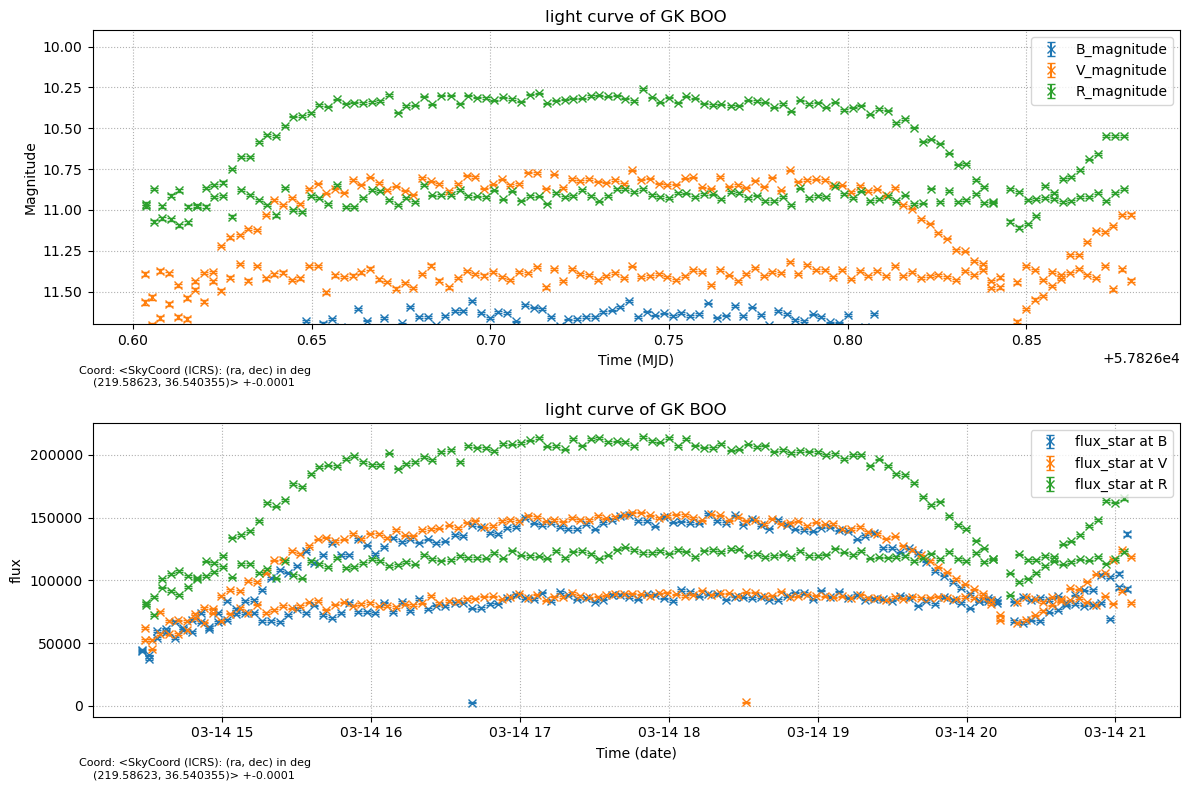

In [92]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), 
                            sharex=False, sharey=False, gridspec_kw=None)

chls = ['B', 'V', 'R']
for chl in chls :
    # if f'{chl}_magnitude' in df_targ:    
    df_targ_chl = df_targ.loc[df_targ["filter"] == chl].copy()
    if not df_targ_chl.empty :
        # print(df_targ_chl)
        # ttime = Time(df_targ_chl["t_middle_dt"])
        im0 = axs[0].errorbar(Time(df_targ_chl["t_middle_dt"]).mjd, 
                df_targ_chl[f'{chl}_magnitude'], yerr=abs(df_targ_chl["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ_chl["t_middle_dt"], 
                df_targ_chl['flux_star'], yerr=abs(df_targ_chl["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star at {chl}')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
    # ylim=(10.8+1, 10.8-1),
    # ylim=(11.25+1.2, 11.25-1.2),   
    # ylim=(10.75+.6, 10.75-.6),   
    ylim=(10.8+.9, 10.8-.9), 
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
) 
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{LIGHTCUEVEDIR}/{READINGDIR.parts[-2]}_{READINGDIR.parts[-1]}_light_curve_{coord_delta}.png")

plt.show()

### add

In [95]:
coord_delta = 0.0001
print(df_targ.columns)
len(df_targ)

Index(['id', 'xcenter', 'ycenter', 'aperture_sum', 'msky', 'sky_std', 'nsky',
       'nrej', 'flux_star', 'flux_err', 'mag_ann', 'merr_ann', 'filename',
       't_start', 't_expos', 't_middle', 'filter', 'zeropt_med', 'zeropt_avg',
       'e_zeropt', 'V_magnitude', 'RAJ2000', 'DEJ2000', 'RAJ2000.1',
       'DEJ2000.1', 't_middle_dt'],
      dtype='object')


1128

In [96]:
df_targ1 = df.loc[(df["RAJ2000"] > targ_sky.ra.value*(1-coord_delta)) \
                    & (df["RAJ2000"] < targ_sky.ra.value*(1+coord_delta)) \
                    & (df["DEJ2000"] > targ_sky.dec.value*(1-coord_delta))\
                    & (df["DEJ2000"] < targ_sky.dec.value*(1+coord_delta))\
                    & (df["merr_ann"] < 1)\
                    # & (df["filter"] == 'V')   
                          ]
len(df_targ1)


569

In [97]:
df_targ1.columns
df_targ1["t_middle_dt"]
type(df_targ["t_middle_dt"])

pandas.core.series.Series

In [98]:

# df_targ = df_targ1
ttime1 = Time(df_targ1["t_middle_dt"])
print(type(ttime1))
print(len(ttime1))
print(ttime1)
print(ttime1.mjd)

<class 'astropy.time.core.Time'>
569
['2016-12-15T08:52:34.000000000' '2016-12-15T08:54:31.500000000'
 '2016-12-15T08:55:09.500000000' '2016-12-15T08:55:47.500000000'
 '2016-12-15T08:56:25.500000000' '2016-12-15T08:57:03.500000000'
 '2016-12-15T08:57:42.500000000' '2016-12-15T08:58:20.500000000'
 '2016-12-15T08:58:58.500000000' '2016-12-15T08:59:36.500000000'
 '2016-12-15T09:00:15.500000000' '2016-12-15T09:00:53.500000000'
 '2016-12-15T09:01:31.500000000' '2016-12-15T09:02:09.500000000'
 '2016-12-15T09:02:47.500000000' '2016-12-15T09:03:25.500000000'
 '2016-12-15T09:04:04.500000000' '2016-12-15T09:04:42.500000000'
 '2016-12-15T09:05:20.500000000' '2016-12-15T09:05:58.500000000'
 '2016-12-15T09:06:36.500000000' '2016-12-15T09:07:14.500000000'
 '2016-12-15T09:07:52.500000000' '2016-12-15T09:08:31.500000000'
 '2016-12-15T09:09:12.500000000' '2016-12-15T09:09:50.500000000'
 '2016-12-15T09:10:28.500000000' '2016-12-15T09:11:10.500000000'
 '2016-12-15T09:11:48.500000000' '2016-12-15T09:12:26

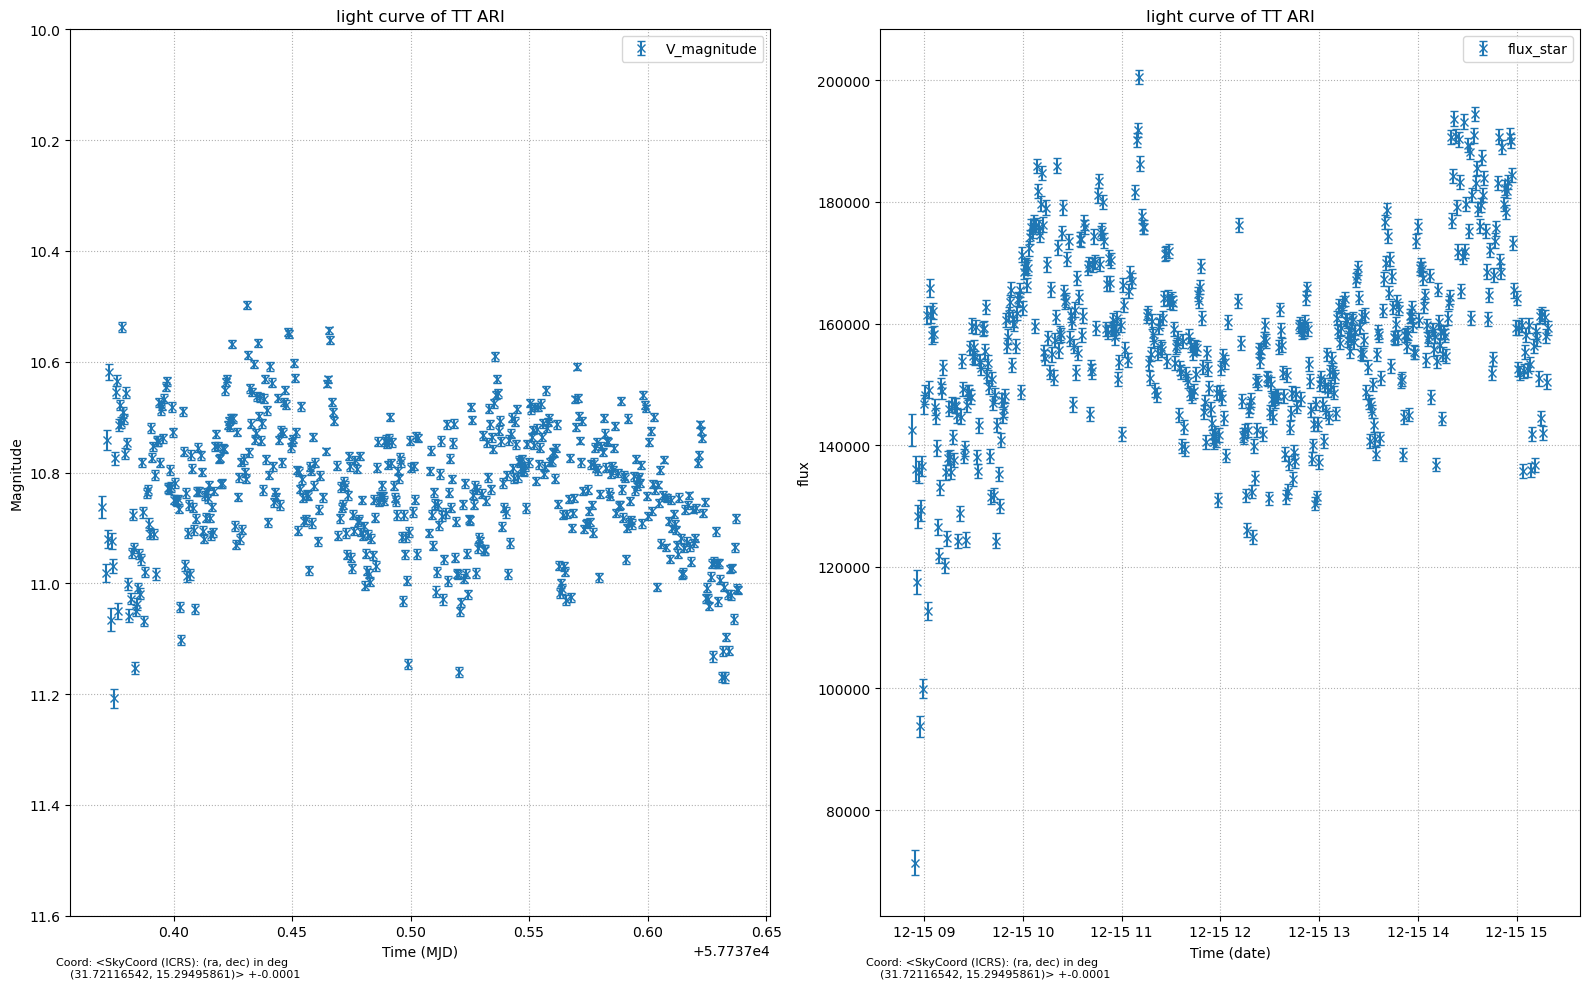

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10), 
                            sharex=False, sharey=False, gridspec_kw=None)

chls = ['B', 'V', 'R']
for chl in chls :
    if f'{chl}_magnitude' in df_targ:
        im0 = axs[0].errorbar(ttime1.mjd, 
                df_targ1[f'{chl}_magnitude'], yerr=abs(df_targ1["merr_ann"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'{chl}_magnitude')
        axs[1].errorbar(df_targ1['t_middle_dt'], 
                df_targ1['flux_star'], yerr=abs(df_targ1["flux_err"]),
                marker='x',
                ls='none',
                #ms=10,
                capsize=3,
                label=f'flux_star')

axs[0].invert_yaxis()

axs[0].set(
    xlabel='Time (MJD)',
    ylabel="Magnitude",
    ylim=(10.8+.8, 10.8-.8), 
)
axs[0].legend()
axs[0].grid(linestyle=':')

axs[0].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[0].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

axs[1].set(
    xlabel='Time (date)',
    ylabel="flux",
)
axs[1].legend()
axs[1].grid(linestyle=':')

axs[1].set_title(f"light curve of {targ_name}", fontsize=12,)
axs[1].annotate(f'Coord: {targ_sky} +-{coord_delta}', fontsize=8,
            xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{LIGHTCUEVEDIR}/{READINGDIR.parts[-2]}_{READINGDIR.parts[-1]}_light_curve_{coord_delta}.png")

plt.show()

In [100]:
import lightkurve as lk

In [101]:
search_result = lk.search_lightcurve(targ_name, author="Kepler", cadence="long")
search_result

SearchResult containing 0 data products.